# Python Project 
### as of 24/2/25

# Importing pandas

In [264]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [265]:
data_df=pd.read_csv('geotracker_sites_2024-11-01(correct encoded).csv').copy()

## Overlook of data set

In [266]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


## Cleaning names 

In [267]:
clean_city=data_df.CITY.str.title()

In [268]:
data_df.CITY=clean_city

In [269]:
data_df.COUNTY=data_df.COUNTY.str.title()

In [270]:
data_df.BUSINESS_NAME=data_df.BUSINESS_NAME.str.title()

## Gathering first details

In [271]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GLOBAL_ID                          75063 non-null  object 
 1   BUSINESS_NAME                      75059 non-null  object 
 2   STREET_NUMBER                      63339 non-null  object 
 3   STREET_NAME                        73457 non-null  object 
 4   CITY                               75023 non-null  object 
 5   STATE                              75063 non-null  object 
 6   ZIP                                70748 non-null  object 
 7   COUNTY                             75056 non-null  object 
 8   EPA_REGION                         75063 non-null  int64  
 9   LATITUDE                           74437 non-null  float64
 10  LONGITUDE                          74437 non-null  float64
 11  COORDINATE_SOURCE                  60899 non-null  obj

## Counting nulls

In [272]:
data_df.isnull().sum()

GLOBAL_ID                                0
BUSINESS_NAME                            4
STREET_NUMBER                        11724
STREET_NAME                           1606
CITY                                    40
STATE                                    0
ZIP                                   4315
COUNTY                                   7
EPA_REGION                               0
LATITUDE                               626
LONGITUDE                              626
COORDINATE_SOURCE                    14164
CASE_TYPE                                0
STATUS                                   0
STATUS_DATE                              3
CLAIM_NO                             55960
CLAIM_STATUS                         55960
LEAD_AGENCY                            843
CASEWORKER                           25909
LOCAL_AGENCY                         36021
RB_CASE_NUMBER                       18049
LOC_CASE_NUMBER                      39283
FILE_LOCATION                        36853
POTENTIAL_C

## Counting Uniques

In [273]:
data_df.BUSINESS_NAME.nunique()

65250

In [274]:
type(data_df.BUSINESS_NAME.unique())

numpy.ndarray

In [275]:
data_df.CITY.nunique()#i am clearly not getting all the uniques, I was retarded and didnt know nunique() was a thing

1932

In [276]:
data_df.DISCHARGE_CAUSE.nunique()

93

In [277]:
data_df.DISCHARGE_SOURCE.nunique()

43

In [278]:
data_df.STOP_METHOD.nunique()

111

In [279]:
data_df.STOP_METHOD.nunique()

111

In [280]:
data_df['DISADVANTAGED_COMMUNITY'].nunique()

2

In [281]:
data_df['DISADVANTAGED_COMMUNITY'].unique()

array([nan, 'Severely Disadvantaged Community', 'Disadvantaged Community'],
      dtype=object)

In [282]:
data_df.GLOBAL_ID.nunique() #all reported leaks are unique 

75063

## Changing object types for date columns

In [283]:
data_df.STATUS_DATE=pd.to_datetime(data_df.STATUS_DATE,dayfirst=True)

In [284]:
data_df.BEGIN_DATE=pd.to_datetime(data_df.BEGIN_DATE,dayfirst=True)

In [285]:
data_df.LEAK_REPORTED_DATE

0                         NaN
1                         NaN
2                         NaN
3        2006-02-28T00:00:00Z
4        2014-11-03T00:00:00Z
                 ...         
75058    1965-01-02T00:00:00Z
75059                     NaN
75060    1998-07-06T00:00:00Z
75061    2008-04-17T00:00:00Z
75062    2004-04-16T00:00:00Z
Name: LEAK_REPORTED_DATE, Length: 75063, dtype: object

In [286]:
data_df.LEAK_REPORTED_DATE=pd.to_datetime(data_df.LEAK_REPORTED_DATE,dayfirst=False)

In [287]:
data_df.LEAK_REPORTED_DATE=data_df.LEAK_REPORTED_DATE.dt.date

In [288]:
data_df.LEAK_REPORTED_DATE=pd.to_datetime(data_df.LEAK_REPORTED_DATE)

In [289]:
data_df.NO_FURTHER_ACTION_DATE=pd.to_datetime(data_df.NO_FURTHER_ACTION_DATE,dayfirst=False)

In [290]:
data_df.NO_FURTHER_ACTION_DATE = data_df.NO_FURTHER_ACTION_DATE.dt.date

In [291]:
data_df.NO_FURTHER_ACTION_DATE=pd.to_datetime(data_df.NO_FURTHER_ACTION_DATE)

In [292]:
data_df.NO_FURTHER_ACTION_DATE

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
75058          NaT
75059   1999-03-31
75060   2013-03-18
75061   2009-04-01
75062   2006-06-23
Name: NO_FURTHER_ACTION_DATE, Length: 75063, dtype: datetime64[ns]

In [293]:
data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   LEAK_REPORTED_DATE      54371 non-null  datetime64[ns]
 1   STATUS_DATE             75060 non-null  datetime64[ns]
 2   BEGIN_DATE              71202 non-null  datetime64[ns]
 3   NO_FURTHER_ACTION_DATE  58411 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.3 MB


In [294]:
data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']]

,LEAK_REPORTED_DATE,STATUS_DATE,BEGIN_DATE,NO_FURTHER_ACTION_DATE
0,NaT,2022-04-01,2009-05-11,NaT
1,NaT,2023-02-28,2019-03-06,NaT
2,NaT,2024-09-01,2014-12-01,NaT
3,2006-02-28,2006-02-28,2006-02-28,NaT
4,2014-11-03,2014-12-08,2014-11-03,NaT
...,...,...,...,...
75058,1965-01-02,1998-03-28,1998-03-27,NaT
75059,NaT,1999-03-31,1999-03-31,1999-03-31
75060,1998-07-06,2013-03-18,1998-07-06,2013-03-18
75061,2008-04-17,2009-04-01,2007-07-29,2009-04-01


In [295]:
data_df_nomissing_dates=data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']].dropna()

In [296]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - La...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaT,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,Mcphail'S,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaT,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo Wwtp,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaT,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,Smothers Deluxe Shell,55,WEST 16TH STREET,Merced,CA,95340,Merced,9,37.298192,...,NaN,NaT,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaT,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,Chevron Pipeline Co - Former Standard Oil Pipe...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaT,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (Mcb) - Ou 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,Cdf Hopland,11000,"HIGHWAY 101, SOUTH",Hopland,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,Imperial Beach,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [297]:
data_df_nomissing_dates

,LEAK_REPORTED_DATE,STATUS_DATE,BEGIN_DATE,NO_FURTHER_ACTION_DATE
213,1991-11-26,1996-03-19,1991-10-02,1996-03-19
214,1988-07-18,1996-03-19,1988-07-14,1996-03-19
218,1991-12-02,1996-03-19,1991-10-17,1996-03-19
221,1989-12-04,1996-03-19,1989-12-04,1996-03-19
226,1990-06-22,1996-03-19,1989-09-22,1996-03-19
...,...,...,...,...
75056,1965-01-02,1995-06-16,1987-04-07,1995-06-16
75057,1990-09-11,1998-12-16,1990-09-11,1998-12-16
75060,1998-07-06,2013-03-18,1998-07-06,2013-03-18
75061,2008-04-17,2009-04-01,2007-07-29,2009-04-01


Possible columns to ignore to go through with Arwa, CLAIM_NO, each row is already a claim so no need for it seeing that 55960 are null. CLAIM_STATUS? S:W, CALWATER_WATERSHED_NAME,SUBBASIN_NAME
cal enviroscreen https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40
https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40summaryofchangesf2021.pdf
calenviro3 is old calc
4 is new calc based on 132 new contaminats added to database

Disadvantaged Communities (DACs)
A community is considered a DAC if its CalEnviroScreen 4.0 score is in the top 25% statewide.
This means a CES4.0 percentile of ≥ 75% (e.g., "75-80%", "95-100%").
Severely Disadvantaged Communities (SDACs)
SDACs are NOT directly determined by CalEnviroScreen scores.
Instead, they are based on Median Household Income (MHI) ≤ 60% of the state median (from other datasets like Census data).
However, SDACs often overlap with DACs since high CES scores correlate with lower-income areas.
Key Takeaway
If "CALENVIROSCREEN4_SCORE" is ≥ 75%, the community is a DAC.
SDACs require income data, so CES4.0 alone isn't enough to classify them.
https://sgc.ca.gov/technical-assistance/toolkit/definitions.html?utm_source=chatgpt.com

# Q1 days taken to report if any and days to rectify if done

In [298]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - La...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaT,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,Mcphail'S,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaT,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo Wwtp,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaT,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,Smothers Deluxe Shell,55,WEST 16TH STREET,Merced,CA,95340,Merced,9,37.298192,...,NaN,NaT,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaT,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,Chevron Pipeline Co - Former Standard Oil Pipe...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaT,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (Mcb) - Ou 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,Cdf Hopland,11000,"HIGHWAY 101, SOUTH",Hopland,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,Imperial Beach,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [299]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION'],
      dtype='object')

In [300]:
X=data_df['BEGIN_DATE']-data_df['LEAK_REPORTED_DATE']  #begin date is the date the case was opened once the leak was discovered

In [301]:
data_df['DAYS_TO_REPORT_LEAK']=X

In [302]:
data_df['DAYS_TO_REPORT_LEAK']

0              NaT
1              NaT
2              NaT
3           0 days
4           0 days
           ...    
75058   12137 days
75059          NaT
75060       0 days
75061    -263 days
75062       0 days
Name: DAYS_TO_REPORT_LEAK, Length: 75063, dtype: timedelta64[ns]

In [303]:
Y=data_df['NO_FURTHER_ACTION_DATE']-data_df['BEGIN_DATE']

In [304]:
data_df['DAYS_TO_NO_FURTHER_ACTION']=Y

## i) Average days to report leak by county 

In [305]:
leak_date_df=data_df.groupby('COUNTY')['DAYS_TO_REPORT_LEAK'].mean().sort_values(ascending=False)
leak_days_df=leak_date_df.dt.days
leak_days_df.info()

<class 'pandas.core.series.Series'>
Index: 58 entries, San Francisco to Santa Cruz
Series name: DAYS_TO_REPORT_LEAK
Non-Null Count  Dtype
--------------  -----
58 non-null     int64
dtypes: int64(1)
memory usage: 928.0+ bytes


In [306]:
leak_date_df.head()

COUNTY
San Francisco   5728 days 11:38:36.144578304
Yuba            3505 days 20:52:10.434782592
Sutter                    2684 days 10:03:00
Glenn           1994 days 13:10:59.154929568
Stanislaus      1781 days 15:31:37.978227072
Name: DAYS_TO_REPORT_LEAK, dtype: timedelta64[ns]

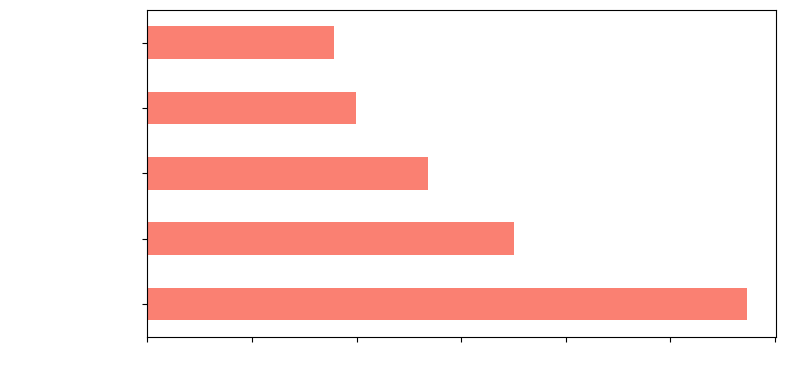

In [350]:
fig=leak_days_df.head(5).plot(kind='barh', color='salmon', xlabel='Days to Report Leak', figsize=(8,4))
#fig = plt.figure()
#fig.patch.set_facecolor('blue')
#!pip install rembg
plt.tight_layout(rect=[None,None, None,None])
plt.xlabel('Days to Fix Leak',color='white', fontweight='bold')
plt.ylabel('County',color='white', fontweight='bold')
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
plt.savefig("chart1.reportleak.png", transparent=True)

## ii) Average days to no further action

In [308]:
no_further_action_df=data_df.groupby('COUNTY')['DAYS_TO_NO_FURTHER_ACTION'].mean().sort_values(ascending=False)
no_further_action_days_df=no_further_action_df.dt.days

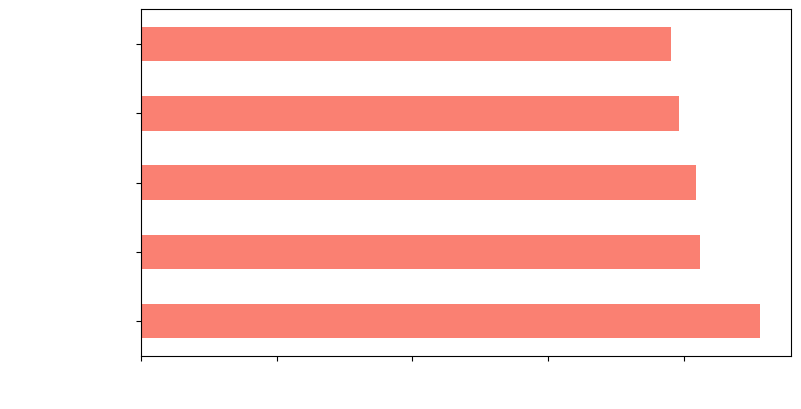

In [351]:
no_further_action_days_df.head(5).plot(kind='barh',color='salmon', fontsize=10, figsize=(8,4))
#fig = plt.figure()
#fig.patch.set_facecolor('blue')
#!pip install rembg
plt.tight_layout(rect=[None,None, None,None])
plt.xlabel('Days to Fix Leak',color='white', fontweight='bold')
plt.ylabel('County',color='white', fontweight='bold')
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
plt.savefig("chart2.fixleak.png", transparent=True)

# Q2 Which company had the most leaks

In [310]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION'],
      dtype='object')

In [311]:
business_leaks_df=pd.DataFrame(data_df.groupby(['BUSINESS_NAME'])['GLOBAL_ID'].count().sort_values(ascending=False))

<Axes: xlabel='Number of Leaks', ylabel='BUSINESS_NAME'>

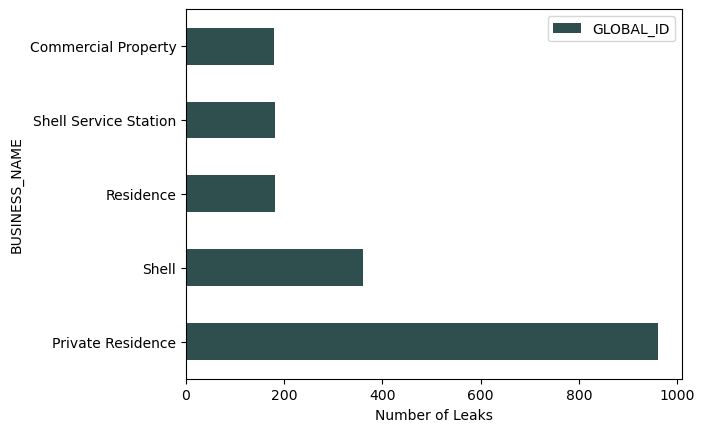

In [312]:
business_leaks_df.head(5).plot(kind='barh', xlabel="Number of Leaks", color='darkslategrey')

# Q3 Which companies didnt disclose the types of contaminants that leaked

In [313]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION'],
      dtype='object')

In [314]:
data_df['BOOL']=data_df['POTENTIAL_CONTAMINANTS_OF_CONCERN'].isnull()

In [315]:
missing_contam_df=data_df[['BUSINESS_NAME','COUNTY','CITY','POTENTIAL_CONTAMINANTS_OF_CONCERN','BOOL']]

In [316]:
county_missing_contam_df=missing_contam_df[missing_contam_df['BOOL']==True] 

<Axes: ylabel='COUNTY'>

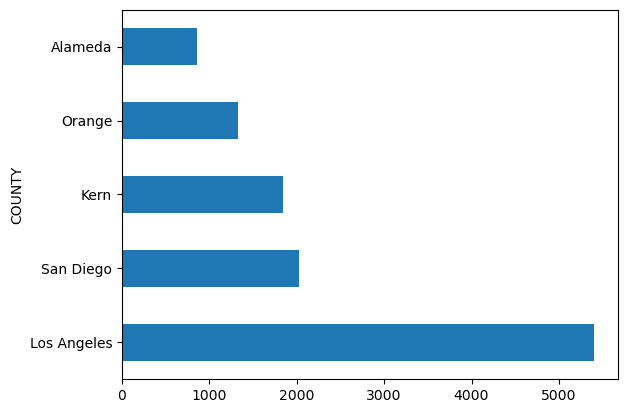

In [317]:
county_missing_contam_df.groupby('COUNTY')['BUSINESS_NAME'].count().sort_values(ascending=False).head(5).plot(kind='barh')

# Q4 Difference in calscore3 and 4? What does it signify 

In [318]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION', 'BOOL'],
      dtype='object'

In [319]:
#actual correct df
no_null_scores=data_df[['BUSINESS_NAME','COUNTY','CITY','CALENVIROSCREEN3_SCORE','CALENVIROSCREEN4_SCORE']][data_df['CALENVIROSCREEN3_SCORE'].notna() & data_df['CALENVIROSCREEN4_SCORE'].notna()]

In [320]:
XY=no_null_scores['CALENVIROSCREEN3_SCORE'].apply(lambda value: value.split()[0].split('-')[1].split('%')[0])

In [321]:
no_null_scores['CALENVIROSCREEN3_SCORE']=XY.apply(int)


In [322]:
ZX=no_null_scores['CALENVIROSCREEN4_SCORE'].apply(lambda value: value.split()[0].split('-')[1].split('%')[0])

In [323]:
no_null_scores['CALENVIROSCREEN4_SCORE']=ZX.apply(int)

In [324]:
no_null_scores

,BUSINESS_NAME,COUNTY,CITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE
0,Fort Hunter Liggett - Fort Hunter Liggett - La...,Monterey,Jolon,45,50
1,Mcphail'S,Sonoma,Santa Rosa,25,25
2,San Luis Obispo Wwtp,San Luis Obispo,San Luis Obispo,20,40
3,Smothers Deluxe Shell,Merced,Merced,95,100
4,One Lawrence Station,Santa Clara,Santa Clara,40,40
...,...,...,...,...,...
75058,Chevron Pipeline Co - Former Standard Oil Pipe...,Stanislaus,Patterson,85,65
75059,Camp Pendleton Marine Corps Base (Mcb) - Ou 3 ...,San Diego,Camp Pendleton,30,50
75060,Cdf Hopland,Mendocino,Hopland,20,15
75061,Imperial Beach Naval Auxiliary Landing Field (...,San Diego,Imperial Beach,30,60


In [325]:
no_null_scores['SCORE_DIFF_%']=no_null_scores['CALENVIROSCREEN4_SCORE']-no_null_scores['CALENVIROSCREEN3_SCORE']

In [326]:
no_null_scores

,BUSINESS_NAME,COUNTY,CITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,SCORE_DIFF_%
0,Fort Hunter Liggett - Fort Hunter Liggett - La...,Monterey,Jolon,45,50,5
1,Mcphail'S,Sonoma,Santa Rosa,25,25,0
2,San Luis Obispo Wwtp,San Luis Obispo,San Luis Obispo,20,40,20
3,Smothers Deluxe Shell,Merced,Merced,95,100,5
4,One Lawrence Station,Santa Clara,Santa Clara,40,40,0
...,...,...,...,...,...,...
75058,Chevron Pipeline Co - Former Standard Oil Pipe...,Stanislaus,Patterson,85,65,-20
75059,Camp Pendleton Marine Corps Base (Mcb) - Ou 3 ...,San Diego,Camp Pendleton,30,50,20
75060,Cdf Hopland,Mendocino,Hopland,20,15,-5
75061,Imperial Beach Naval Auxiliary Landing Field (...,San Diego,Imperial Beach,30,60,30


In [327]:
no_null_scores['SCORE_DIFF_%'][no_null_scores['SCORE_DIFF_%']<0]

21       -5
24       -5
43       -5
45      -10
54      -15
         ..
75051   -15
75054   -15
75058   -20
75060    -5
75062    -5
Name: SCORE_DIFF_%, Length: 25434, dtype: int64

<Axes: ylabel='COUNTY'>

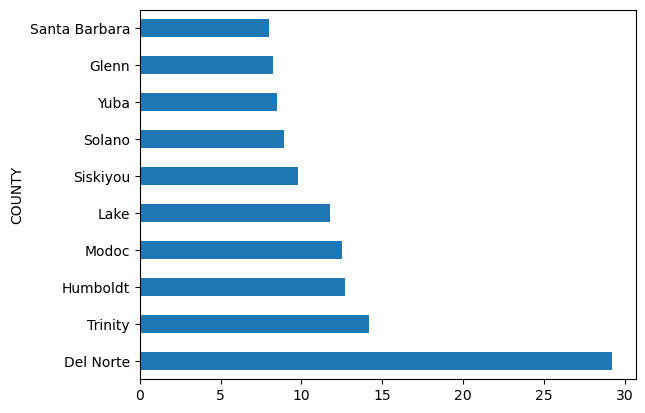

In [328]:
no_null_scores.groupby('COUNTY')['SCORE_DIFF_%'].mean().sort_values(ascending=False).head(10).plot(kind='barh') #positives

<Axes: ylabel='COUNTY'>

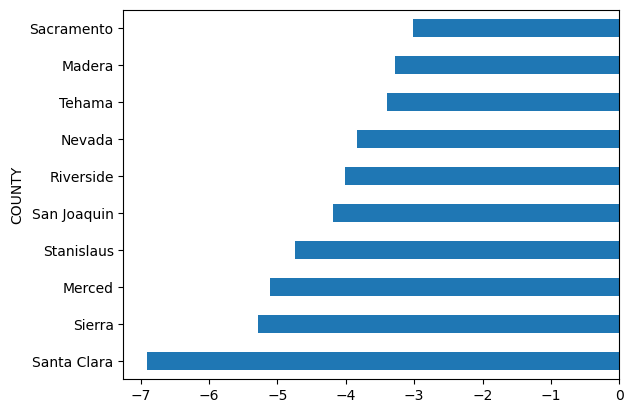

In [329]:
no_null_scores.groupby('COUNTY')['SCORE_DIFF_%'].mean().sort_values(ascending=True).head(10).plot(kind='barh',x="COUNTY",y='SCORE_DIFF_%') #negatives

<Axes: ylabel='COUNTY'>

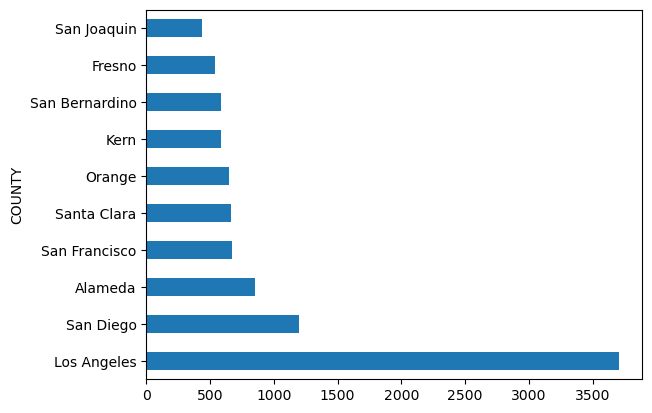

In [330]:
zero_perc_diff_df=no_null_scores[no_null_scores['SCORE_DIFF_%']==0]
zero_perc_diff_df.COUNTY.value_counts().head(10).plot(kind='barh')

#zero_perc_diff_df[['COUNTY','']].value_counts().head(10).plot(kind='barh')

# Q5 EXCEL PLOTTING Where are the disadvantaged and severely disadvantaged communities by county?

In [331]:

DAC_df=data_df[data_df['DISADVANTAGED_COMMUNITY']=='Disadvantaged Community']

In [332]:
SDAC_df=data_df[data_df['DISADVANTAGED_COMMUNITY']=='Severely Disadvantaged Community']

In [333]:
DAC_by_COUNTY_df=pd.DataFrame(DAC_df.groupby('COUNTY')['DISADVANTAGED_COMMUNITY'].count().sort_values(ascending=False))

In [334]:
SDAC_by_COUNTY_df=pd.DataFrame(SDAC_df.groupby('COUNTY')['DISADVANTAGED_COMMUNITY'].count().sort_values(ascending=False))

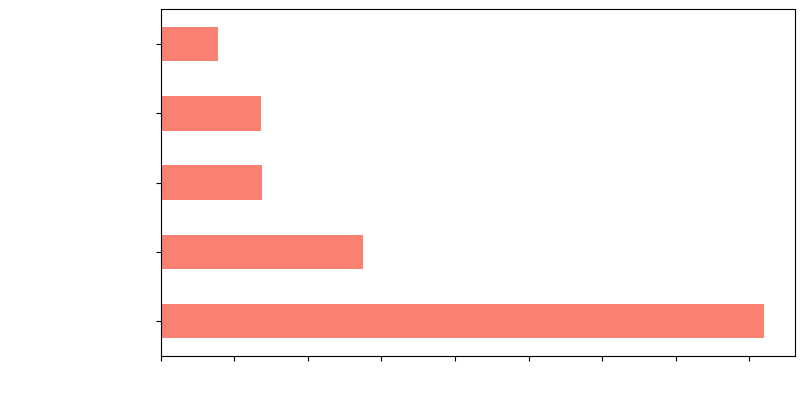

In [353]:
discounty=DAC_by_COUNTY_df.head(5).plot(kind='barh',color='salmon', fontsize=10, figsize=(8,4),legend=False)
plt.tight_layout(rect=[None,None, None,None])
plt.xlabel('Distribution',color='white', fontweight='bold')
plt.ylabel('County',color='white', fontweight='bold')
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
plt.savefig("chart4.disCounty.png", transparent=True)


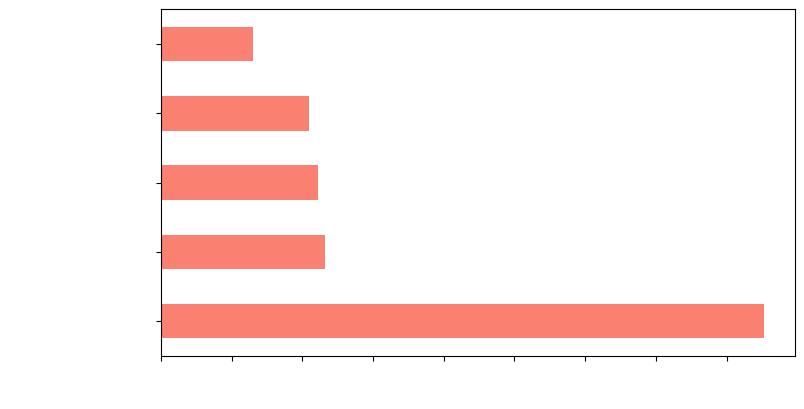

In [354]:
sdiscounty=SDAC_by_COUNTY_df.head(5).plot(kind='barh',color='salmon', fontsize=10, figsize=(8,4), legend=False)
plt.tight_layout(rect=[None,None, None,None])
plt.xlabel('Distribution',color='white', fontweight='bold')
plt.ylabel('County',color='white', fontweight='bold')
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
plt.savefig("chart5.SdisCounty.png", transparent=True)


In [337]:
mass=data_df['DISADVANTAGED_COMMUNITY'].value_counts()
mass
#data_df.plot.pie(y='mass')

DISADVANTAGED_COMMUNITY
Severely Disadvantaged Community    7355
Disadvantaged Community             6605
Name: count, dtype: int64

# Q6 Most common contaminants?

In [338]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION', 'BOOL'],
      dtype='object'

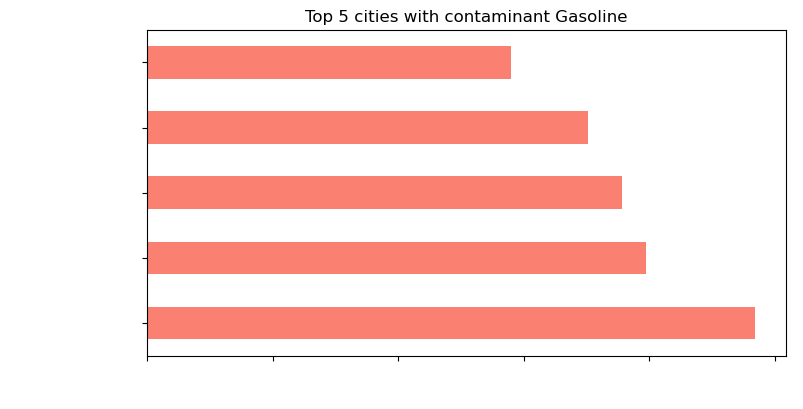

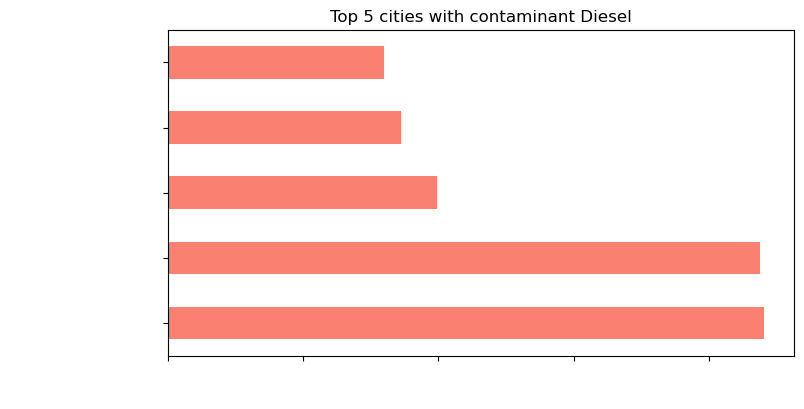

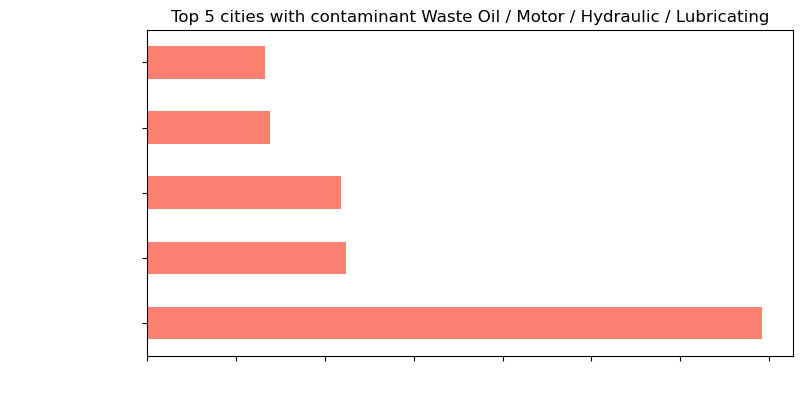

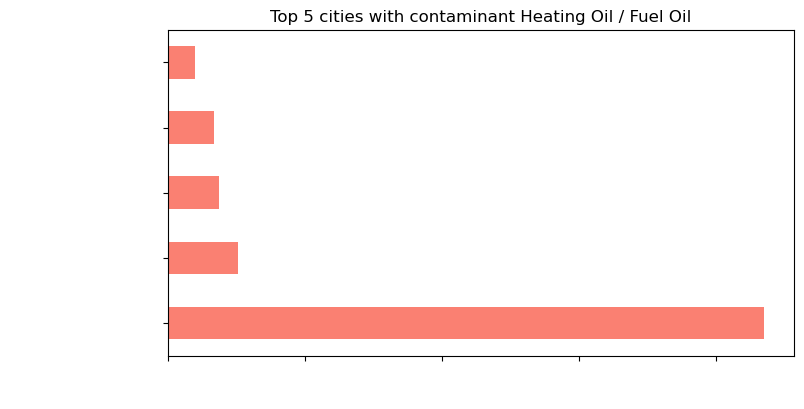

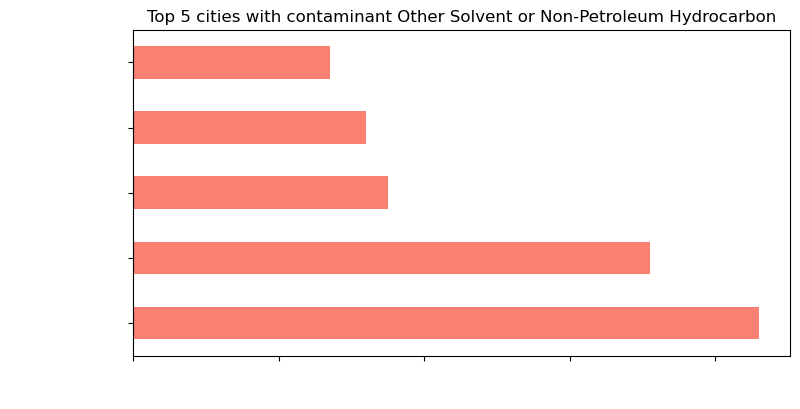

In [380]:
# Juan's example
#Step 1: get a list with the top contaminants
top5_contaminants = data_df.POTENTIAL_CONTAMINANTS_OF_CONCERN.value_counts().index.tolist()[:5] #[0]#[1]
# print(top5_contaminants)
from PIL import Image
import os
#Step 2: filter the data and only get records that have those contaminants
top5_filter = data_df['POTENTIAL_CONTAMINANTS_OF_CONCERN'].isin(top5_contaminants) #.dropna().apply(lambda x: x in top5_contaminants)
# print(top5_filter.head())
lim = 5
for i in top5_contaminants:
    data_df[data_df['POTENTIAL_CONTAMINANTS_OF_CONCERN'] == i].groupby(['CITY'])["GLOBAL_ID"].count().sort_values(ascending=False).head(lim).plot(kind='barh', title=f"Top {lim} cities with contaminant {i}",color='salmon', fontsize=10, figsize=(8,4))
    plt.tight_layout(rect=[None,None, None,None])
    plt.xlabel('Contaminant',color='white', fontweight='bold')
    plt.ylabel('County',color='white', fontweight='bold')
    plt.xticks(color='white', fontweight='bold')
    plt.yticks(color='white', fontweight='bold')
    filename= f'Chartsss{i[0]}.png'
    plt.savefig(filename, transparent=True)
    plt.show()

    #table.to_frame()# top_cont_df.info()

In [341]:
#pot_cont=data_df.POTENTIAL_CONTAMINANTS_OF_CONCERN.value_counts().head(12)
#pot_cont.to_csv("ContaminatTop12Data.csv")

# Q7 Volume of leaks by county


In [358]:
leak_vol_df=data_df.groupby('COUNTY')['QUANTITY_RELEASED_GALLONS'].mean().sort_values(ascending=False)

<Axes: ylabel='COUNTY'>

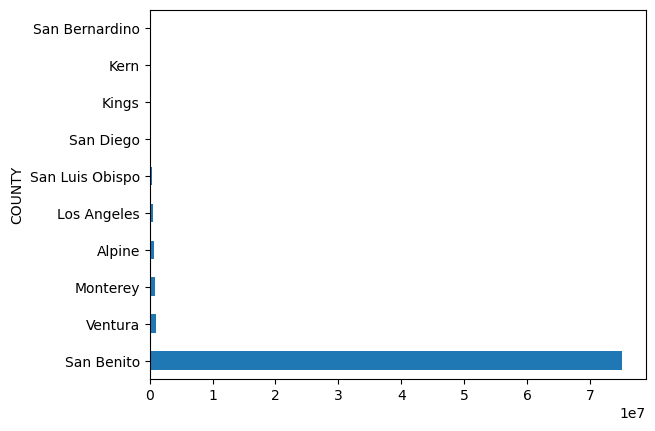

In [359]:
leak_vol_df.head(10).plot(kind='barh')

# Q8 correlation of days to report, repair, vol of contam, and disadvantaged

In [360]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   GLOBAL_ID                          75063 non-null  object         
 1   BUSINESS_NAME                      75059 non-null  object         
 2   STREET_NUMBER                      63339 non-null  object         
 3   STREET_NAME                        73457 non-null  object         
 4   CITY                               75023 non-null  object         
 5   STATE                              75063 non-null  object         
 6   ZIP                                70748 non-null  object         
 7   COUNTY                             75056 non-null  object         
 8   EPA_REGION                         75063 non-null  int64          
 9   LATITUDE                           74437 non-null  float64        
 10  LONGITUDE             

In [361]:
corr_df=data_df[['DAYS_TO_REPORT_LEAK','DAYS_TO_NO_FURTHER_ACTION', 'BOOL']]

In [362]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   DAYS_TO_REPORT_LEAK        54092 non-null  timedelta64[ns]
 1   DAYS_TO_NO_FURTHER_ACTION  56871 non-null  timedelta64[ns]
 2   BOOL                       75063 non-null  bool           
dtypes: bool(1), timedelta64[ns](2)
memory usage: 1.2 MB


In [363]:
import seaborn as sns

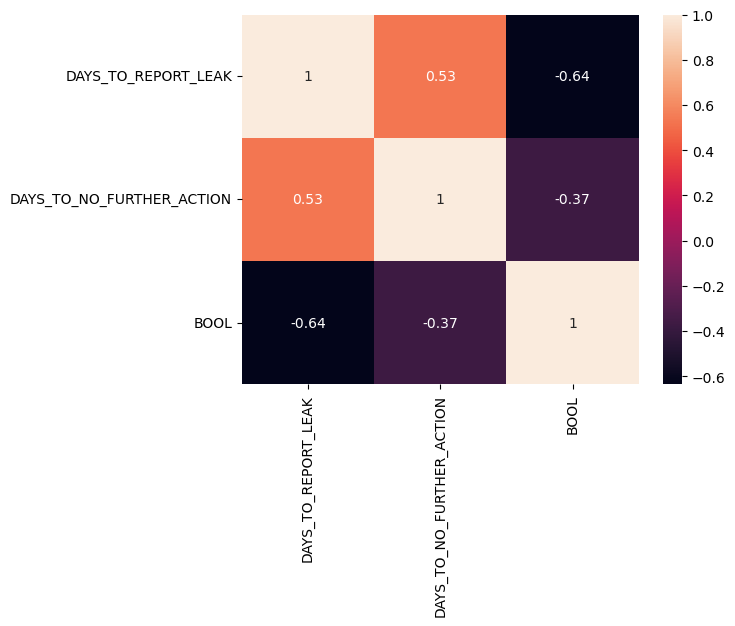

In [364]:
sns.heatmap(corr_df.corr(numeric_only=False), annot=True)
plt.savefig('Q8heatmap.png')

In [365]:
data_df.DAYS_TO_REPORT_LEAK.info()

<class 'pandas.core.series.Series'>
RangeIndex: 75063 entries, 0 to 75062
Series name: DAYS_TO_REPORT_LEAK
Non-Null Count  Dtype          
--------------  -----          
54092 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 586.6 KB


In [366]:
columns_2_display = [c for c in data_df.columns if "DATE" in c] + ["DAYS_TO_REPORT_LEAK"] #.extend(
print(columns_2_display)

['STATUS_DATE', 'BEGIN_DATE', 'LEAK_REPORTED_DATE', 'NO_FURTHER_ACTION_DATE', 'DAYS_TO_REPORT_LEAK']


In [367]:
data_df[columns_2_display][data_df['DAYS_TO_REPORT_LEAK'].dt.days<0]

,STATUS_DATE,BEGIN_DATE,LEAK_REPORTED_DATE,NO_FURTHER_ACTION_DATE,DAYS_TO_REPORT_LEAK
24,2017-06-13,2007-03-30,2007-04-04,NaT,-5 days
29,2011-01-18,1991-01-30,1991-04-30,NaT,-90 days
43,2024-05-24,2003-12-05,2004-02-11,NaT,-68 days
46,2023-11-02,2004-04-13,2004-05-06,NaT,-23 days
47,2017-08-30,1989-08-02,1989-08-25,NaT,-23 days
...,...,...,...,...,...
75049,1996-01-22,1992-03-09,1994-01-24,1996-01-22,-686 days
75051,2001-09-05,1999-02-03,1999-04-22,2001-09-05,-78 days
75052,1987-12-03,1987-07-14,1987-08-13,1987-12-03,-30 days
75055,2002-02-26,1990-05-21,1994-12-03,2002-02-26,-1657 days


In [368]:
data_df[['LEAK_REPORTED_DATE','BEGIN_DATE','DAYS_TO_REPORT_LEAK']]

,LEAK_REPORTED_DATE,BEGIN_DATE,DAYS_TO_REPORT_LEAK
0,NaT,2009-05-11,NaT
1,NaT,2019-03-06,NaT
2,NaT,2014-12-01,NaT
3,2006-02-28,2006-02-28,0 days
4,2014-11-03,2014-11-03,0 days
...,...,...,...
75058,1965-01-02,1998-03-27,12137 days
75059,NaT,1999-03-31,NaT
75060,1998-07-06,1998-07-06,0 days
75061,2008-04-17,2007-07-29,-263 days


### Map Stuff
- San Diego -> Top in: Gasoline + Waste Oil / Motor / Hydraulic / Lubricating
- San Francisco -> Top in: Diesel + Heating Oil / Fuel Oil
- Los angelos -> Top in: Other Solvent or Non-Petroleum Hydrocarbon